In [91]:
# import required libraries
import os, sys
import numpy as np, pandas as pd, seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.metrics import r2_score

In [92]:
# function to read RAMAH output files (*.stat)
def read_stat_file(filename):
    fin = open(filename, "r")
    res_name = []
    res_id = []
    meas_rdc = []
    bc_rdc = []
    bond_vector = []
    for line in fin:
        if "Residue          Error   >Error" in line:
            break
    
    for line in fin:
        if "Res" in line:
            words = line.strip().split()
            rnum = words[1].strip().split('#')[-1]
            bv = words[2].strip().split(':')[0]
            meas = words[5]
            pred = words[6]
            res_id.append(int(rnum))
            bond_vector.append(bv)
            meas_rdc.append(float(meas))
            bc_rdc.append(float(pred))
    
    df = pd.DataFrame()
    df["res_id"] = res_id
    df["measured_rdc"] = meas_rdc
    df["predicted_rdc"] = bc_rdc
    df["bond_vector"] = bond_vector
    return df

In [93]:
# function to get fit order tensor parameters from RAMAH output files (*.stat)
def get_order_tensor_params(filename):
    fin = open(filename, "r")
    gdo = 0
    eta = 0
    rmsd = 0
    for line in fin:
        if "Eta" in line:
            words = line.strip().split('|')
            eta = float(words[1].strip())
        elif "GDO" in line:
            words = line.strip().split('|')
            gdo = float(words[1].strip())
        elif "RDC rmsd" in line:
            words = line.strip().split('|')
            rmsd = float(words[1].strip())
    return (gdo, eta, rmsd)

In [94]:
# Read in E0 Fits:
E0_H1 = read_stat_file("data/E0-wt-TAR-H1-Fit.stat")
E0_H2 = read_stat_file("data/E0-wt-TAR-H2-Fit.stat")
E0_H1_params = get_order_tensor_params("data/E0-wt-TAR-H1-Fit.stat")
E0_H2_params = get_order_tensor_params("data/E0-wt-TAR-H2-Fit.stat")
print("Summary of RAMAH results read from stat file:")
print("---- H1 RDC Fit:")
print(E0_H1.head(3))
print("---- H2 RDC Fit:")
print(E0_H2.head(3))
print("---- H1 Tensor Params:")
print(E0_H1_params)
print("---- H2 Tensor Params:")
print(E0_H2_params)

Summary of RAMAH results read from stat file:
---- H1 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      18           6.6          6.082       C8-H8
1      18          -5.9         -7.785       N1-H1
2      20          16.7         16.773       C2-H2
---- H2 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      26          22.8         20.876       C8-H8
1      27         -23.9        -22.217     C1'-H1'
2      27          21.6         23.083       C2-H2
---- H1 Tensor Params:
(0.00064456, 0.33772, 1.1821)
---- H2 Tensor Params:
(0.0011877, 0.09876, 1.6821)


In [95]:
# Read in EI22 Fits:
EI22_H1 = read_stat_file("data/EI22-wt-TAR-H1-Fit.stat")
EI22_H2 = read_stat_file("data/EI22-wt-TAR-H2-Fit.stat")
EI22_H1_params = get_order_tensor_params("data/EI22-wt-TAR-H1-Fit.stat")
EI22_H2_params = get_order_tensor_params("data/EI22-wt-TAR-H2-Fit.stat")
print("Summary of RAMAH results read from stat file:")
print("---- H1 RDC Fit:")
print(EI22_H1.head(3))
print("---- H2 RDC Fit:")
print(EI22_H2.head(3))
print("---- H1 Tensor Params:")
print(EI22_H1_params)
print("---- H2 Tensor Params:")
print(EI22_H2_params)

Summary of RAMAH results read from stat file:
---- H1 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      20          29.8           29.8       C8-H8
1      20          38.2           38.2       C2-H2
2      21          26.9           26.9       C8-H8
---- H2 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      26          16.4         13.333       C8-H8
1      27          31.5         32.354       C8-H8
2      27          15.9         18.700       C2-H2
---- H1 Tensor Params:
(0.0039545, 0.61552, 0.0)
---- H2 Tensor Params:
(0.0014839, 0.84277, 2.1021)


In [96]:
# Read in EII3 Fits:
EII3_H2 = read_stat_file("data/EII3-wt-TAR-All-H2-Fit.stat")
EII3_H2_params = get_order_tensor_params("data/EII3-wt-TAR-All-H2-Fit.stat")
print("Summary of RAMAH results read from stat file:")
print("---- H2 RDC Fit:")
print(EII3_H2.head(3))
print("---- H2 Tensor Params:")
print(EII3_H2_params)

Summary of RAMAH results read from stat file:
---- H2 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      28          16.5         17.162       C8-H8
1      26          12.5         12.772       C8-H8
2      36           9.6          6.303       C8-H8
---- H2 Tensor Params:
(0.00061546, 0.17856, 2.6232)


In [97]:
# Read in EII13 Fits:
EII13_H2 = read_stat_file("data/EII13-wt-TAR-All-H2-Fit.stat")
EII13_H2_params = get_order_tensor_params("data/EII13-wt-TAR-All-H2-Fit.stat")
print("Summary of RAMAH results read from stat file:")
print("---- H2 RDC Fit:")
print(EII13_H2.head(3))
print("---- H2 Tensor Params:")
print(EII13_H2_params)

Summary of RAMAH results read from stat file:
---- H2 RDC Fit:
   res_id  measured_rdc  predicted_rdc bond_vector
0      28          35.9         34.596       C8-H8
1      36          34.4         31.747       C8-H8
2      36         -52.1        -50.309     C1'-H1'
---- H2 Tensor Params:
(0.0021606, 0.32536, 2.79)


In [98]:
# Settings for matplotlib
plt.rcParams["font.family"] = "Arial"
mpl.rcParams['axes.linewidth'] = 2
plt.rcParams.update({'font.size': 20})

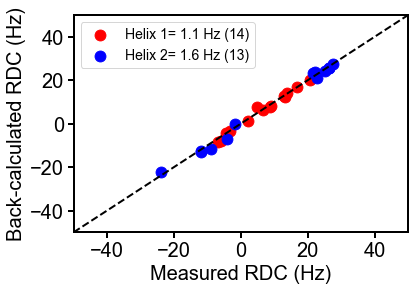

In [99]:
# Plot E0 measured vs back-calculated from RAMAH:
fig, ax = plt.subplots(figsize=(6,4))

# H1:
x = E0_H1.measured_rdc
y = E0_H1.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="red", marker="o", s=120, 
                label="Helix 1= %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

# H2:
x = E0_H2.measured_rdc
y = E0_H2.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="blue", marker="o", s=120, 
                label="Helix 2= %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

ax.tick_params(width=2,length=6)
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Back-calculated RDC (Hz)")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
plt.plot([-50, 50], [-50, 50], "k--", lw=2)
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/E0-RAMAH-Fit.pdf")

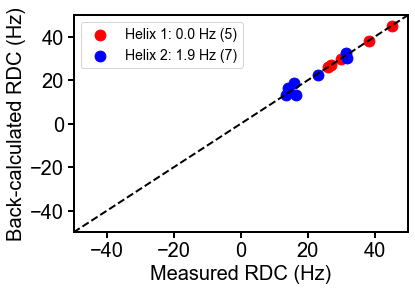

In [100]:
# Plot EI22 measured vs back-calculated from RAMAH:
fig, ax = plt.subplots(figsize=(6,4))

# H1:
x = EI22_H1.measured_rdc
y = EI22_H1.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="red", marker="o", s=120, 
                label="Helix 1: %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

# H2:
x = EI22_H2.measured_rdc
y = EI22_H2.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="blue", marker="o", s=120, 
                label="Helix 2: %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

ax.tick_params(width=2,length=6)
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Back-calculated RDC (Hz)")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
plt.plot([-50, 50], [-50, 50], "k--", lw=2)
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/EI22-RAMAH-Fit.pdf")

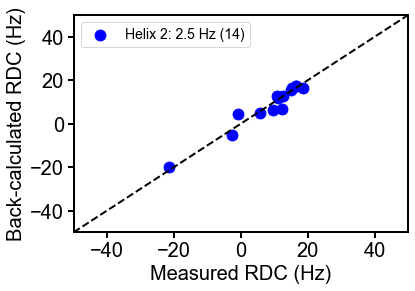

In [101]:
# Plot EII3 measured vs back-calculated from RAMAH:
fig, ax = plt.subplots(figsize=(6,4))


# H2:
x = EII3_H2.measured_rdc
y = EII3_H2.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="blue", marker="o", s=120, 
                label="Helix 2: %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

ax.tick_params(width=2,length=6)
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Back-calculated RDC (Hz)")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
plt.plot([-50, 50], [-50, 50], "k--", lw=2)
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/EII3-RAMAH-Fit.pdf")

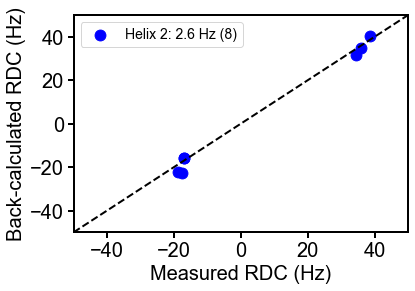

In [102]:
# Plot EII13 measured vs back-calculated from RAMAH:
fig, ax = plt.subplots(figsize=(6,4))


# H2:
x = EII13_H2.measured_rdc
y = EII13_H2.predicted_rdc
RMSD = np.sqrt(np.mean((x-y)**2))
coefficient_of_dermination = r2_score(x, y)
N = x.shape[0]
sns.scatterplot(x=x, y=y, color="blue", marker="o", s=120, 
                label="Helix 2: %3.1f Hz (%d)"%(RMSD, N), edgecolor=None)

ax.tick_params(width=2,length=6)
ax.set_xlabel("Measured RDC (Hz)")
ax.set_ylabel("Back-calculated RDC (Hz)")
ax.set_xlim([-50, 50])
ax.set_ylim([-50, 50])
plt.plot([-50, 50], [-50, 50], "k--", lw=2)
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/EII13-RAMAH-Fit.pdf")

[0.64456, 3.9544999999999995, 0, 0]
[1.1877, 1.4839, 0.61546, 2.1606]


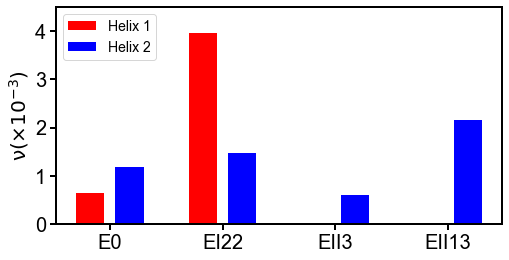

In [119]:
# Plot comparison of order tensor parameter GDO:

labels = ["E0", "EI22", "EII3", "EII13"]
H2_GDO = [E0_H2_params[0]*1.0e3, EI22_H2_params[0]*1.0e3, EII3_H2_params[0]*1.0e3, EII13_H2_params[0]*1.0e3]
H1_GDO = [E0_H1_params[0]*1.0e3, EI22_H1_params[0]*1.0e3, 0, 0]

print(H1_GDO)
print(H2_GDO)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))

rects1 = ax.bar(x - width/2-0.05, H1_GDO, width, label='Helix 1', color='red')
rects2 = ax.bar(x + width/2+0.05, H2_GDO, width, label='Helix 2', color='blue')

ax.set_xticks(x, labels)
ax.tick_params(width=2,length=6)
#ax.set_xlabel("Construct")
ax.set_ylabel(r"$\rm{\nu (\times 10^{-3})}$")
ax.set_ylim([0, 4.5])
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/GDO-Comparison.pdf")

[0.33772, 0.61552, 0, 0]
[0.09876, 0.84277, 0.17856, 0.32536]


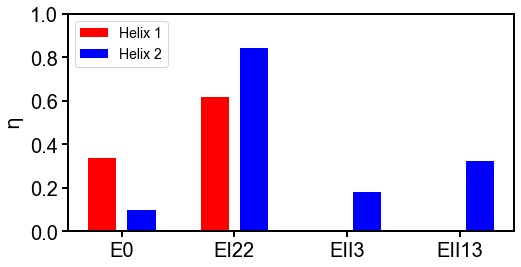

In [120]:
# Plot comparison of order tensor parameter Rhombicity:

labels = ["E0", "EI22", "EII3", "EII13"]
H2_GDO = [E0_H2_params[1], EI22_H2_params[1], EII3_H2_params[1], EII13_H2_params[1]]
H1_GDO = [E0_H1_params[1], EI22_H1_params[1], 0, 0]

print(H1_GDO)
print(H2_GDO)

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))

rects1 = ax.bar(x - width/2-0.05, H1_GDO, width, label='Helix 1', color='red')
rects2 = ax.bar(x + width/2+0.05, H2_GDO, width, label='Helix 2', color='blue')

ax.set_xticks(x, labels)
ax.tick_params(width=2,length=6)
#ax.set_xlabel("Construct")
ax.set_ylabel(r"$\rm{\eta}$")
ax.set_ylim([0, 1])
plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/Rhombicity-Comparison.pdf")

[0.5426959669950323, 2.664936990363232, 0, 0]


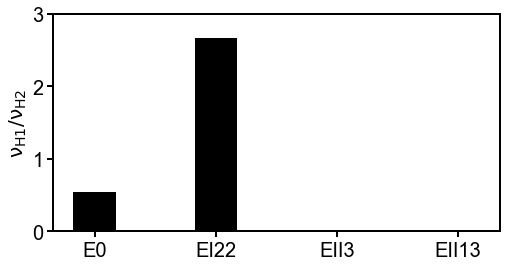

In [121]:
# Plot comparison of order tensor parameter GDO:

labels = ["E0", "EI22", "EII3", "EII13"]
H1_GDO = [E0_H1_params[0]/E0_H2_params[0], EI22_H1_params[0]/EI22_H2_params[0], 0, 0]

print(H1_GDO)


x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,4))

rects1 = ax.bar(x, H1_GDO, width, color='black')

ax.set_xticks(x, labels)
ax.tick_params(width=2,length=6)
#ax.set_xlabel("Construct")
ax.set_ylabel(r"$\rm{ \nu_{H1}/\nu_{H2} }$")
ax.set_ylim([0, 3])
#plt.legend(loc="upper left", prop={'size': 14})

plt.savefig("plots/Interhelical-GDO-Comparison.pdf")